In [1]:
%%html
<link rel="stylesheet" type="text/css" href="style.css">

# UCL BIOC0016 - Bioinformatics
Alan R. Lowe (a.lowe@ucl.ac.uk)

---


### Bioimage informatics / Machine learning

The aim of the exercises in this notebook is to familiarise you with the different steps of evaluating the performance of a simple convolutional neural network (CNN). You will use a real CNN to classify different cell states using image data provided to you. A more sophisticated version of this neural network has been used in recently published research. The architecture of the network is similar to those you will have learnt about in the lectures.

The CNN has been pre-trained on a dataset of real images from data collected at UCL. This is a very simple CNN, and you are going to assess the performance of it by making predictions of the cell state using image data, and comparing these with your ground truth annotation.  The images that you are provided with are called a 'hold out' set, since they have come from the much larger original data set, but have not been used to train the neural network. The CNN has not 'seen' these data during the training phase, and therefore represent a real test of the performance of the network.  

The practical contains following sections:

1. Data annotation
2. Make predictions with a convolutional neural network
3. Compare these with the data that you have annotated
4. Determine the accuracy of the model

### Instructions

Code sections are coloured according to the following scheme:

* <div class="task_red"> Code that needs to be written by you. </div>
* <div class="task_blue"> Code that needs to be edited by you, perhaps changing some parameters. </div>
* <div class="task_green"> A task that needs to be completed by you. This may be recording the results. </div>


### Be part of the research project!

This is based on a real research project, and you can contribute to the project by recording your results as part of the practical. You can read more about the research project [here](http://lowe.cs.ucl.ac.uk/cellx.html).

As you complete different sections of the practical, we ask you to complete different sections of a google form. By recording the results, you can contribute to the research programme.

### Further reading
* http://lowe.cs.ucl.ac.uk/cellx.html
* https://en.wikipedia.org/wiki/Bioimage_informatics
* https://teachablemachine.withgoogle.com/train/image

# PRACTICAL
---

## PART 1 - Data Annotation


To test how well the neural network is able to perform on unseen images, we need to manually annotate some new and unseen images with a label. We can then count how many labels the neural network correctly predicts. In this section, you will be provided with a random sample of unlabeled images. You will need at least 25, although the more the better. Using the guide below, please annotate each image with one of the six labels provided. If you are unsure, use the 'Unknown' label.

Here are some examples of cells and their corresponding labels:

![Cell state labels](./files/cell_states.png "Title")


You will store these annotations using two Python data structures, a `list` and a `dictionary`.

A `list` is just what it sounds like, a sequence of items in order. A list can have multiple entries (separated by commas), or be empty:
```python
list_of_numbers = [0, 1, 2, 3, 4]
empty_list = []
```

A `dictionary` stores key-value pairs.

The final data structure may look something like this:

```python 
annotation = {'interphase': [0,5,3,20], 
              'prometaphase': [7,2], 
              'metaphase': [14,33,6], 
              'anaphase': [508,1], 
              'apoptosis': [8], 
              'unknown': []}```

### Set up plotting and import some useful libraries

In [2]:
%matplotlib inline

import helpers

### Get a sample of images from the test dataset

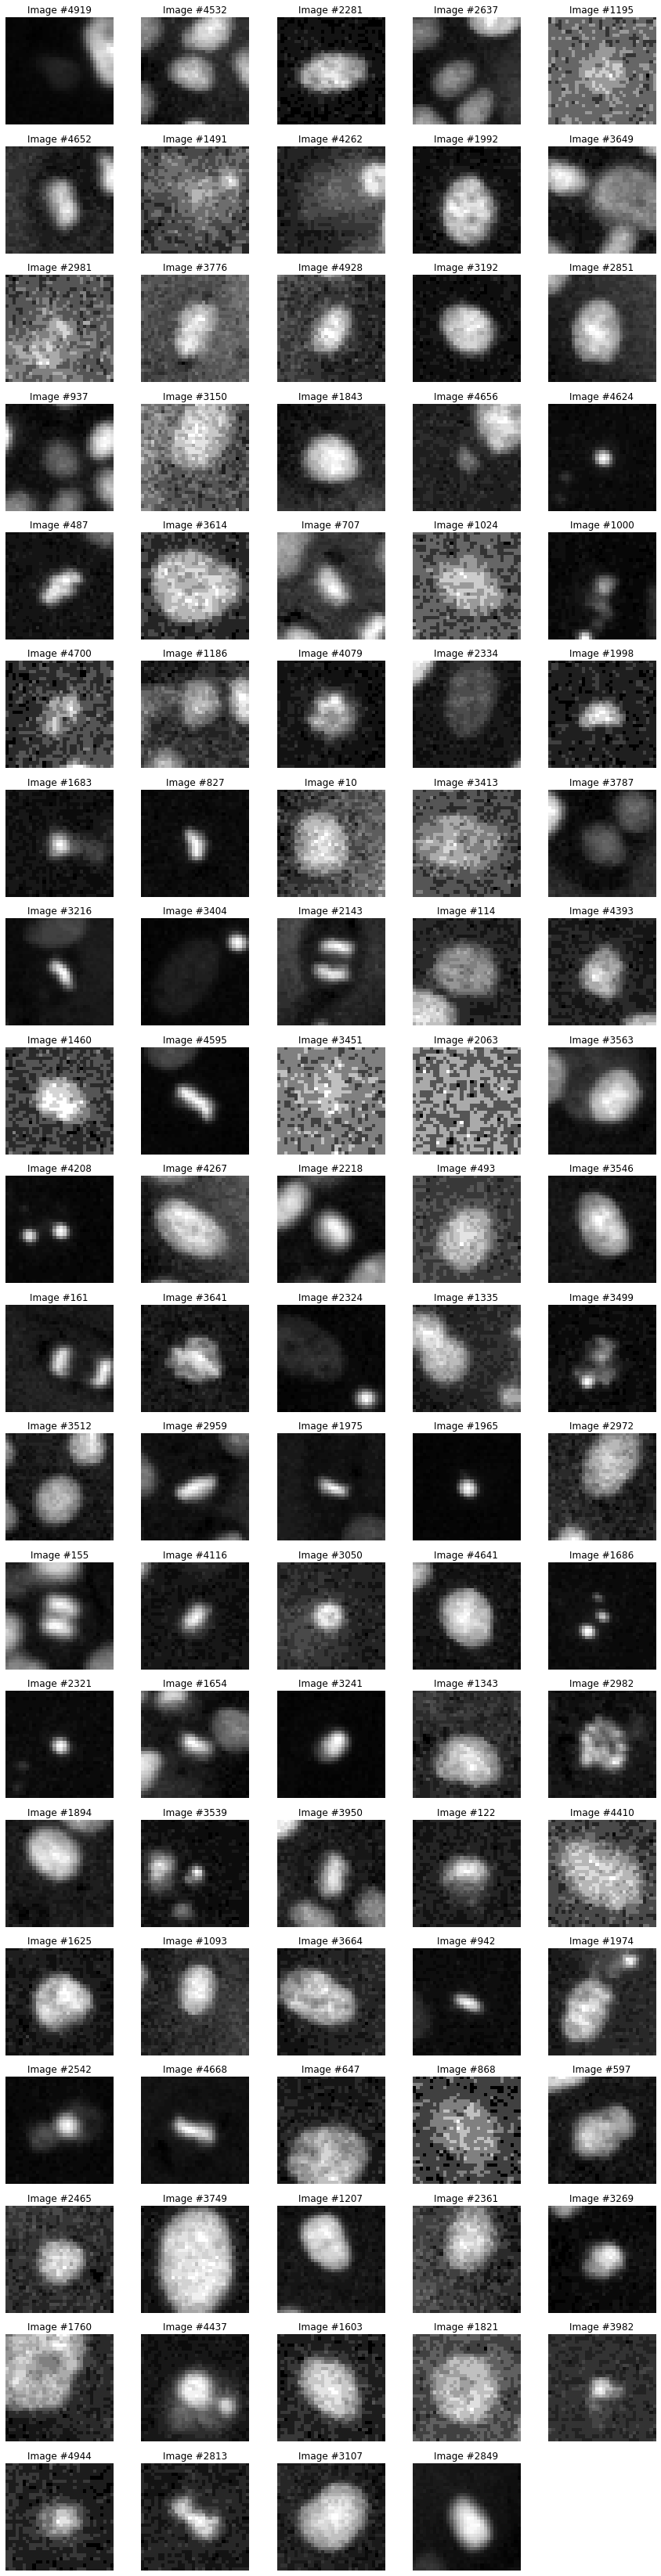

In [13]:
images, image_idx = helpers.get_example_images(num_images=99)
helpers.plot_images(images, image_idx)

<div class="task_blue"> <b>TASK</b>: try changing the number of images. For the remainder of the practical, you will need at least 25 images.</div>

<div class="task_red">
    <b>TASK:</b> Complete the annotation dictionary. To do this you will need to make a list of the image numbers, and your best guess as to the label that each image should have. Once you have this, compile the information into a dictionary structure, and run the validation to make sure that the annotation format is correct. If the validation returns True, you can copy the annotation cell to the form.          
</div>

In [4]:
annotation = {}

In [5]:
# validate the annotation
helpers.validate_annotation(annotation)

True

<div class="task_green">
    <b>TASK:</b> Complete the <a href="https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform">Google form</a>, to record the annotations you have made
</div>


## PART 2 - Using the CNN to make predictions
---


The (pseudo)code for the neural network looks like this:

```python

def simple_CNN(convolutional_kernels=32):
    """ simple_CNN
    
    Build a simple convolutional classifier, that returns a one-hot classification (5,)
    
    Args:
        convolutional_kernels: the number of kernels for the conv layers
        
    Returns:
        a keras model of the CNN
    """
    # first, set up the input layer
    image = Input(shape=[32, 32, 1], name="input")

    # convolutions and pooling
    conv1 = Conv2D(convolutional_kernels, (3, 3), activation='relu', padding='valid')(image)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(convolutional_kernels, (3, 3), activation='relu', padding='valid')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # flatten the data and fully connect to output layer
    flat1 = Flatten()(pool2)
    logits = Dense(5, activation='linear')(flat1)
    softmax = Activation('softmax', name='output')(logits)

    # return the full model
    return Model(inputs=image, outputs=softmax, name="Convolutional_Neural_Network")
```

In the following lines of code `helpers.load_CNN_model()` builds the network shown above, and sets the weights and biases using the pretrained values.

In [6]:
model = helpers.load_CNN_model()

### Make the predictions

The predictions are returned as the probability of the label given the image data:

\begin{equation}
P(\text{label} | \text{data})
\end{equation}


<div class="task_red"> <b>TASK:</b> </div>

In [14]:
import numpy as np
predictions = model.predict(np.stack([im[...,np.newaxis] for im in images], axis=0))

In [15]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred, predictions.shape)

[4 3 0 3 4 2 4 4 1 4 4 0 0 0 0 3 2 0 3 4 2 0 3 0 4 4 2 4 1 4 4 3 3 1 3 3 0
 3 0 0 0 2 4 4 2 4 0 3 0 0 3 1 4 3 1 3 3 3 4 3 1 3 4 0 4 4 3 4 3 1 3 4 2 4
 0 0 3 1 3 3 4 2 3 0 0 0 0 2 3 4 4 4 0 0 4 4 2 0 0] (99, 5)


In [16]:
for i, y in enumerate(y_pred):
    print(f'Image #{image_idx[i]:<5} --> {helpers.STATES[y]:>12} ({predictions[i,y]:.5f})')

Image #4919  -->    apoptosis (0.74567)
Image #4532  -->     anaphase (0.72553)
Image #2281  -->   interphase (0.63334)
Image #2637  -->     anaphase (0.98039)
Image #1195  -->    apoptosis (0.96235)
Image #4652  -->    metaphase (0.66285)
Image #1491  -->    apoptosis (0.86856)
Image #4262  -->    apoptosis (0.99399)
Image #1992  --> prometaphase (0.63028)
Image #3649  -->    apoptosis (0.52731)
Image #2981  -->    apoptosis (0.99929)
Image #3776  -->   interphase (0.85054)
Image #4928  -->   interphase (0.69174)
Image #3192  -->   interphase (0.89751)
Image #2851  -->   interphase (0.71640)
Image #937   -->     anaphase (0.69077)
Image #3150  -->    metaphase (0.74486)
Image #1843  -->   interphase (0.94106)
Image #4656  -->     anaphase (0.93908)
Image #4624  -->    apoptosis (0.99999)
Image #487   -->    metaphase (0.96352)
Image #3614  -->   interphase (0.84186)
Image #707   -->     anaphase (0.89000)
Image #1024  -->   interphase (0.90307)
Image #1000  -->    apoptosis (0.96588)
